

# <font color='GREY'> PLN - An√°lise de Satisfa√ß√£o dos Clientes do E-commerce</font>


**Olist**: ‚ÄúA plataforma olist est√° presente nos principais canais online do Brasil. √â a maior loja de departamentos no mercado brasileiro. 
 www.olist.com


![alt text](https://i.imgur.com/JuJMns1.png)
![alt text](https://olist.com/wp-content/uploads/2020/02/lojas-de-celulares-e-smartphones-790x1024.jpg)

# 1¬∞ - Problema de Neg√≥cio - Entendendo seus clientes



1. Precisamos compreender as avalia√ß√µes dos clientes pois elas s√£o cruciais para o sucesso de uma empresa.

2. Precisamos avaliar o sentimento do cliente em rela√ß√£o √† marca. 

A an√°lise dos coment√°rios ajuda a discernir adequadamente as diferentes prefer√™ncias, gostos, desgostos, etc. do cliente. Esses insights extra√≠dos podem ser usados ‚Äã‚Äãpara melhorar o servi√ßo e a experi√™ncia do cliente. 


# 2¬∞ - An√°lise Explorat√≥ria dos Dados 



## **Fonte de Dados**: 

 Este √© um conjunto de dados p√∫blico de com√©rcio eletr√¥nico brasileiro de pedidos feitos na Olist Store. O conjunto de dados cont√©m informa√ß√µes de 100 mil pedidos de 2016 a 2018 feitos em diversos mercados no Brasil. 

Seus recursos permitem a visualiza√ß√£o de um pedido em m√∫ltiplas dimens√µes: desde o status do pedido, pre√ßo, desempenho de pagamento e frete at√© a localiza√ß√£o do cliente, atributos do produto e, **finalmente, avalia√ß√µes escritas pelos clientes**. Tamb√©m lan√ßamos um conjunto de dados de geolocaliza√ß√£o que relaciona os c√≥digos postais brasileiros √†s coordenadas lat / lng.


Estes **s√£o dados comerciais reais**, foram anonimizados e as refer√™ncias √†s empresas e parceiros no texto da avalia√ß√£o foram substitu√≠das pelos nomes das grandes casas de Game of Thrones.

 
 https://www.kaggle.com/olistbr/brazilian-ecommerce

In [1]:
# Importando bibliotecas necess√°rias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Linguagem natural
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Ferramentas NLTK para processamento de texto
import re, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS


# Pacotes de modelagem
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import  warnings
warnings.filterwarnings("ignore")

In [2]:
# Leitura no conjunto de dados e revis√µes
review_df = pd.read_csv('olist_order_reviews_dataset.csv')
review_df.head()

# Informa√ß√µes b√°sicas
print(f'Registros: {len(review_df)}\nVari√°veis: {len(review_df.columns)}')

# Mostrar todas as colunas da base:
pd.set_option('display.max_columns', None)

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parab√©ns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

Registros: 100000
Vari√°veis: 7


In [3]:
# Veja alguns detalhes
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


# EDA autom√°tica atrav√©s do PandasProfiling

In [4]:
import pandas_profiling as pp
pp.ProfileReport(review_df)

# EDA autom√°tica atrav√©s do SweetViz


In [5]:
import sweetviz

In [6]:
eda = sweetviz.analyze(review_df)
eda.show_html(filepath = 'Relatorio_Univariado.html')


Report Relatorio_Univariado.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# EDA autom√°tica atrav√©s do D-Tale

In [7]:
import dtale

In [8]:
#Para visualiza√ß√£o/edi√ß√£o apenas enquanto o processamento estiver ligado..
Relatorio1c = dtale.show(review_df)
Relatorio1c

# EDA autom√°tica atrav√©s do Autoviz

In [9]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (100000, 7)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 100000 rows, 7 cols
Data Set columns info:
* review_id: 0 nulls, 99173 unique vals, most common: {'4548534449b1f572e357211b90724f1b': 3, '7b606b0d57b078384f0b58eac1d41d78': 3}
* order_id: 0 nulls, 99441 unique vals, most common: {'c88b1d1b157a9999ce368f218a407141': 3, 'df56136b8031ecd28e200bb18e6ddb2e': 3}
* review_score: 0 nulls, 5 unique vals, most common: {5: 57420, 4: 19200}
* review_comment_title: 88285 nulls, 4600 unique vals, most common: {'Recomendo': 426, 'recomendo': 346}
* review_comment_message: 58247 nulls, 36921 unique vals, most common: {'Muito bom': 230, 'Bom': 189}
* review_creation_date: 0 nulls, 637 unique vals, most common: {'2017-12-19 00:00:00': 466, '2018-08-28 00:00:00': 453}
* review_answer_timestamp: 0 nulls, 99010 unique vals, most common: {'2017-06-15 23:21:05': 4, '2017-08-30 11:18:29': 3}
---

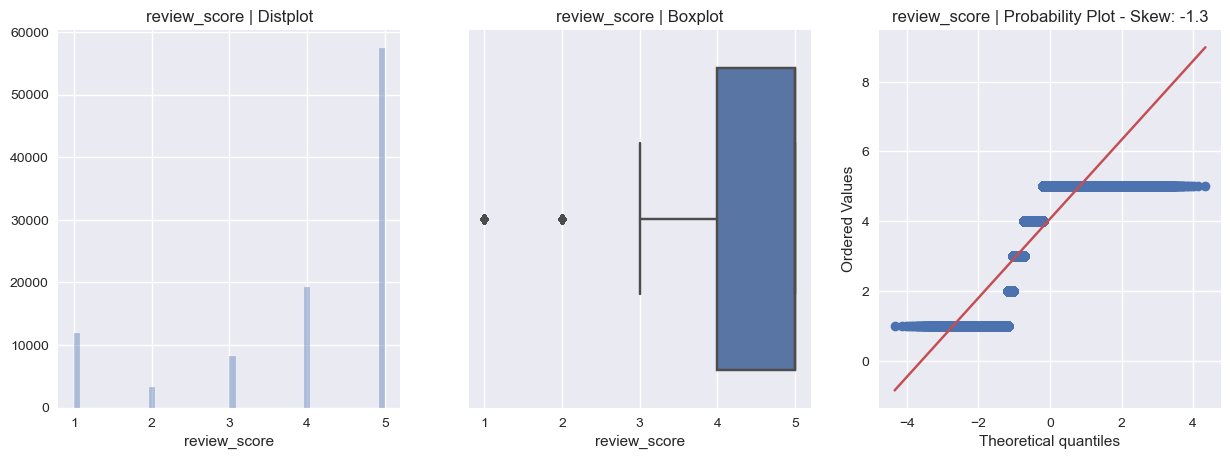

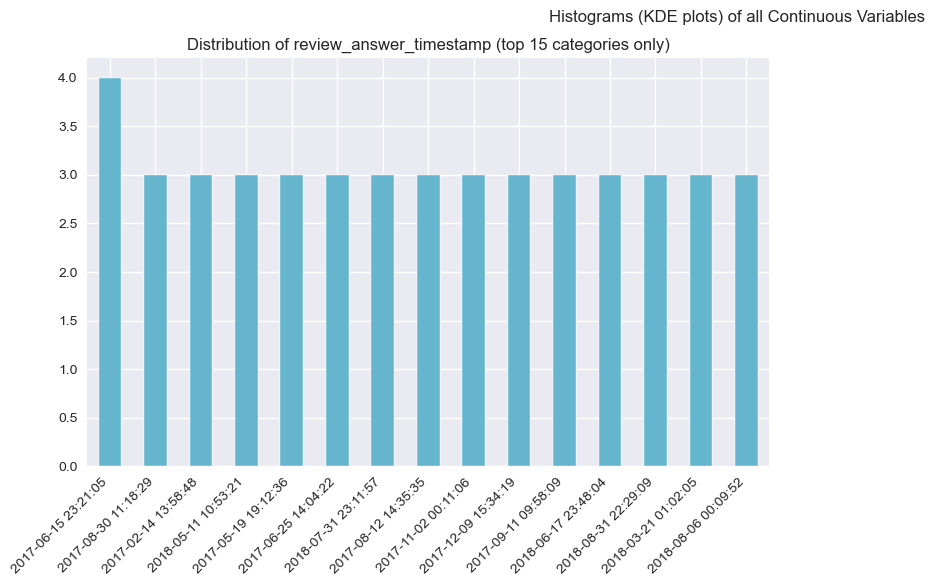

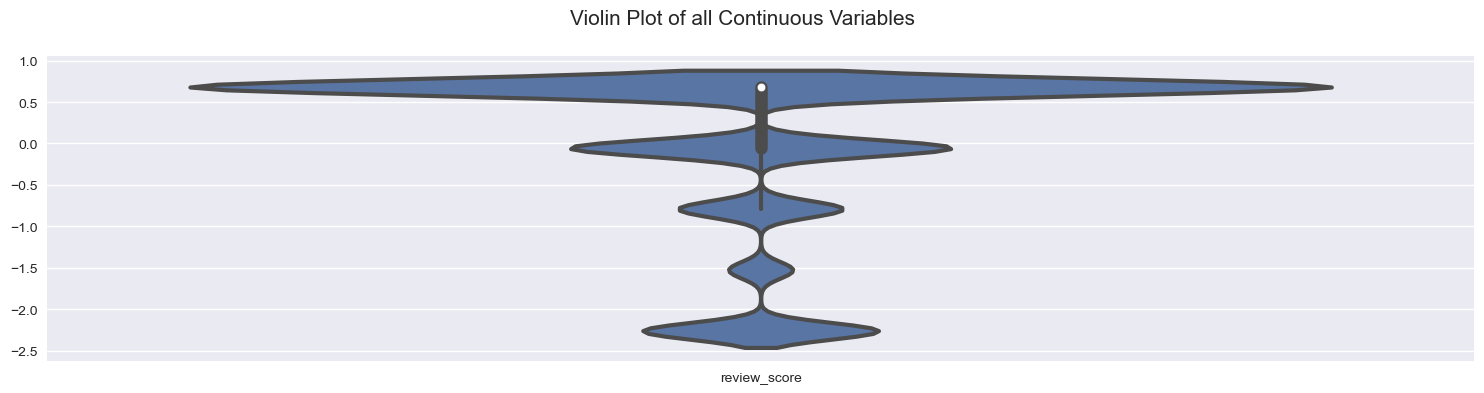

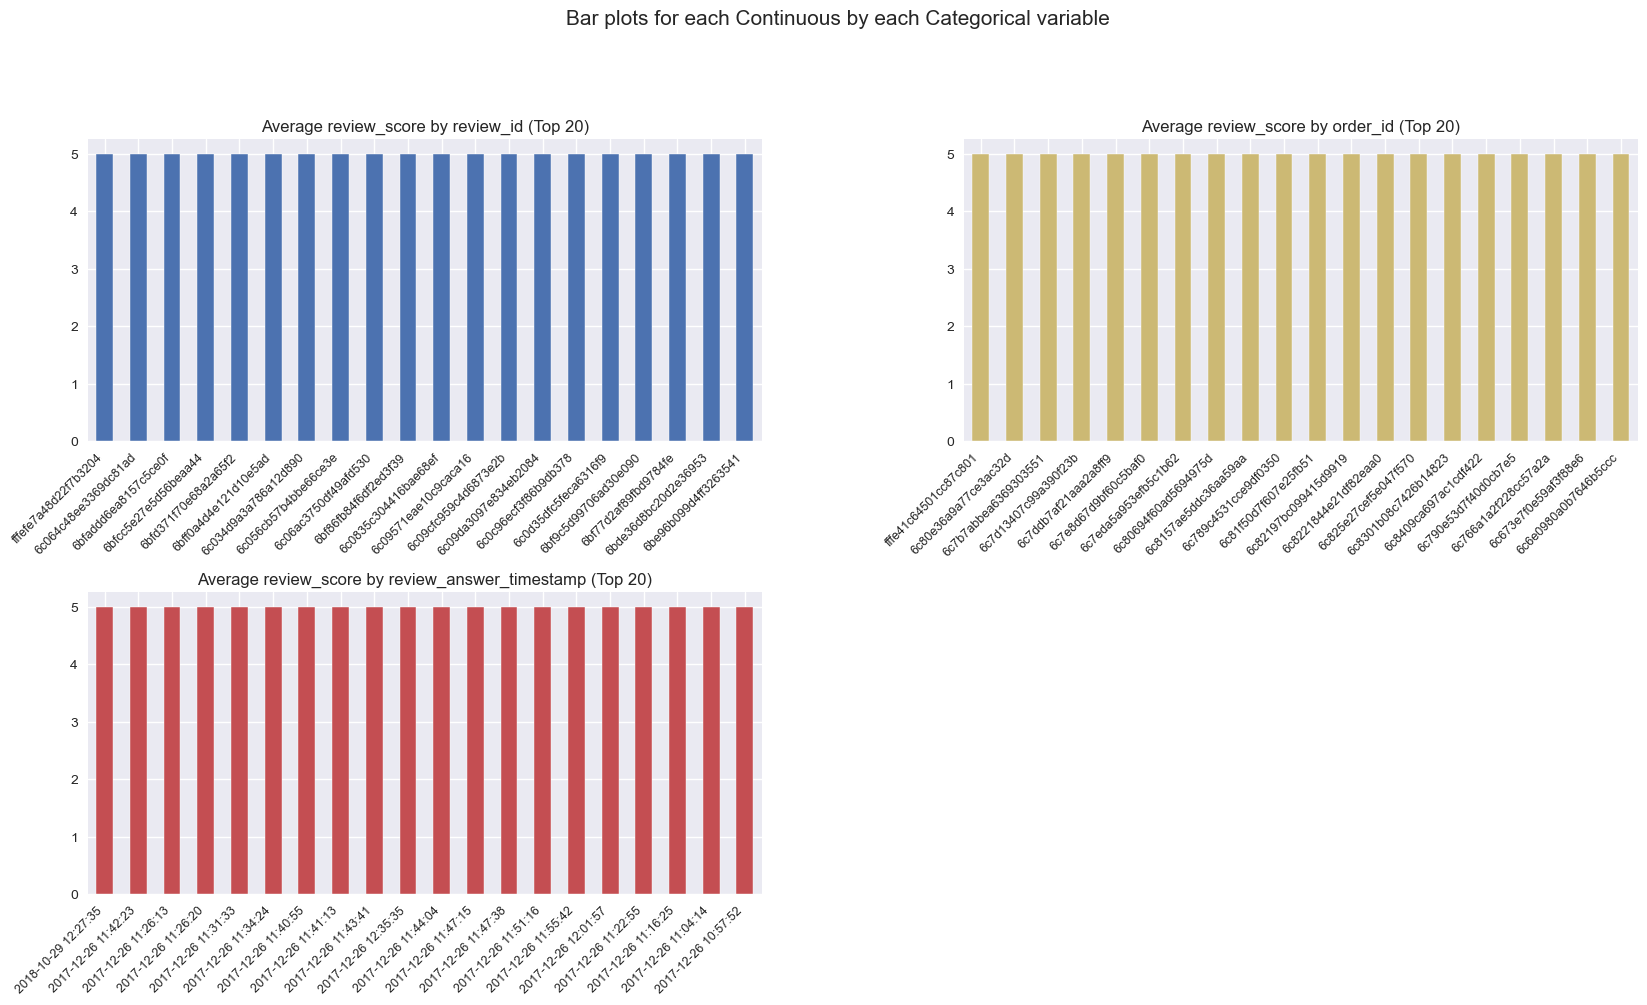

In [10]:
sep = ','

dft = AV.AutoViz(filename="",sep=sep, dfte=review_df, header=0, verbose=2, lowess=False, chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=30) #

In [11]:
# Tipo de dados de cada atributo
review_df.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [12]:
review_df.size

700000

In [13]:
# Verifique o n√∫mero de valores diferentes em cada coluna.
review_df.nunique().sort_values()

review_score                   5
review_creation_date         637
review_comment_title        4600
review_comment_message     36921
review_answer_timestamp    99010
review_id                  99173
order_id                   99441
dtype: int64

In [14]:
# retorna a quantidade de linha de todas as colunas
review_df.count()

review_id                  100000
order_id                   100000
review_score               100000
review_comment_title        11715
review_comment_message      41753
review_creation_date       100000
review_answer_timestamp    100000
dtype: int64

In [15]:
# Tabela de Frequencia 
review_df['review_comment_title'].value_counts()

Recomendo                    426
recomendo                    346
Bom                          294
super recomendo              271
Excelente                    248
                            ... 
N√£o recebi o outro produt      1
Eficiente e qualidade          1
***** recomendo 25/07/20       1
√ìtima mercadoria               1
√ìtima cinta                    1
Name: review_comment_title, Length: 4600, dtype: int64

In [16]:
# Tabela de Frequencia 
review_df['review_comment_message'].value_counts()

Muito bom                                                                                                       230
Bom                                                                                                             189
muito bom                                                                                                       122
bom                                                                                                             107
Recomendo                                                                                                       100
                                                                                                               ... 
Como sempre...recebido no prazo. Produto lindo!!! Ultra satisfeita.                                               1
C√¢mera cl√°ssica de 1992 por um √≥timo pre√ßo.                                                                       1
ao verificar o mapa no site n√£o havia as medidas do mesmo ou seja 1

In [17]:
## Tabela de Frequencia 
review_df['review_score'].value_counts()

5    57420
4    19200
1    11858
3     8287
2     3235
Name: review_score, dtype: int64

In [18]:
# lista de todas as colunas do dataset
review_df.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [19]:
# Verificando o skew de cada atributo
review_df.skew()

review_score   -1.337827
dtype: float64

In [20]:
len(review_df)

100000

In [21]:
# Temos valores ausentes nos coment√°rios e seus t√≠tulos
review_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

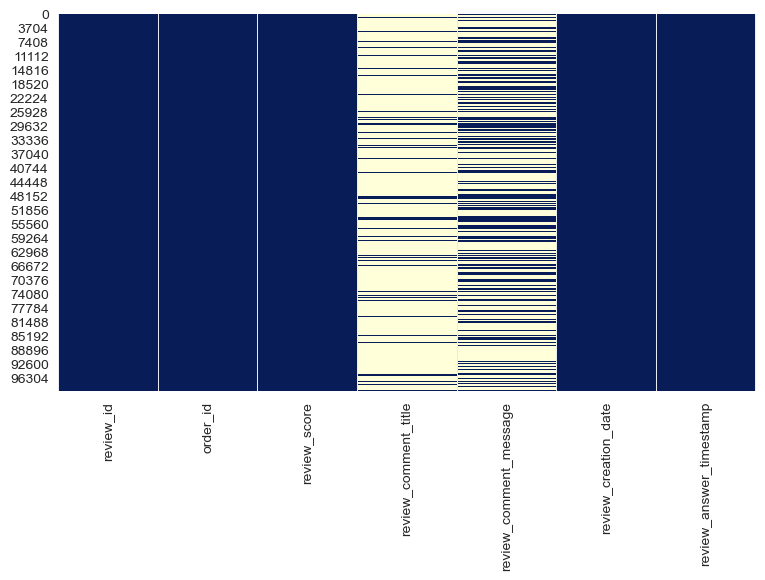

In [22]:
#valor nulo encontrado no conjunto de dados
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(review_df.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show();

In [23]:
# Verifique se h√° duplicado
review_df.duplicated().sum()

0

In [24]:
#Removendo duplicatas se houver
review_df.drop_duplicates(keep=False, inplace=True)

In [25]:
#removendo duplicados colunas
_,i =np.unique(review_df.columns, return_index=True)
data=review_df.iloc[:, i]

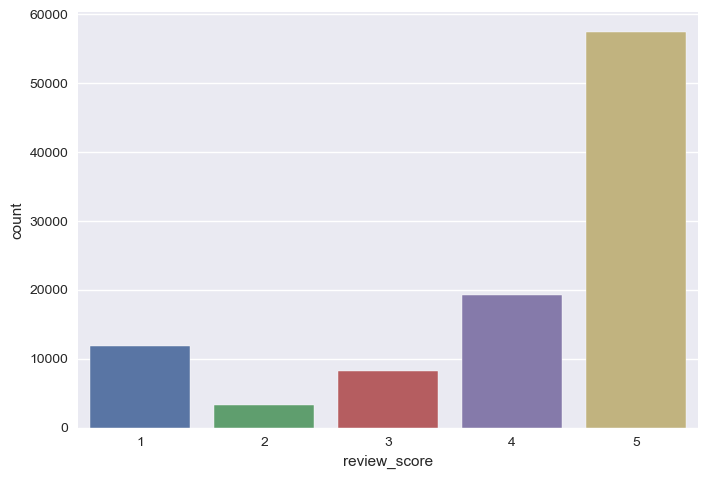

In [26]:
# Cria um gr√°fico de barras da vari√°vel 
sns.countplot(review_df['review_score']);

In [27]:
#Estat√≠sticas descritivas das vari√°veis num√©ricas
review_df.describe().round(2)

review_score
count     100000.00
mean           4.07
std            1.36
min            1.00
25%            4.00
50%            5.00
75%            5.00
max            5.00

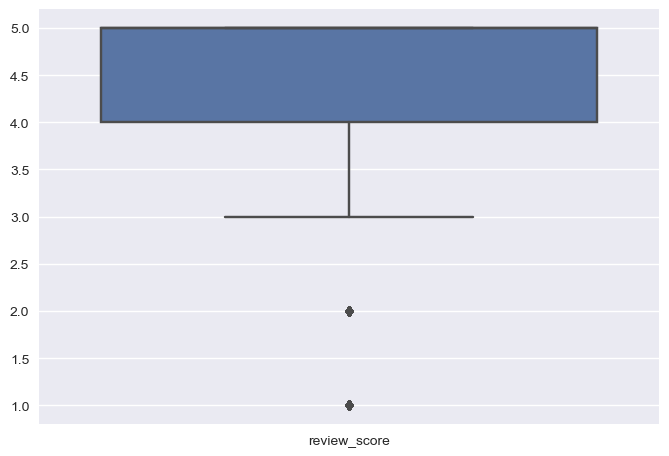

In [28]:
#No gr√°fico podemos verificar se existe outiler
sns.boxplot(data=review_df);

In [29]:
review_df.describe(include = 'all')

review_id                          order_id  \
count                             100000                            100000   
unique                             99173                             99441   
top     4548534449b1f572e357211b90724f1b  c88b1d1b157a9999ce368f218a407141   
freq                                   3                                 3   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

         review_score review_comment_title review_comment_message  \
count   100000.000000                11715                  41753   
unique            NaN                 4600                  36921   
top               NaN            Recomendo              Muito bom   
freq              NaN                  426                    230   
mean         4.070890                  NaN                    NaN   
std          1.359663                  NaN                    NaN   
min          1.000000                  NaN                    NaN   
25%          4.000000                  NaN                    NaN   
50%          5.000000                  NaN                    NaN   
75%          5.000000                  NaN                    NaN   
max          5.000000                  NaN                    NaN   

       review_creation_date review_answer_timestamp  
count                100000                  100000  
unique                  637                   99010  
top     2017-12-19 00:00:00     2017-06-15 23:21:05  
freq                    466                       4  
mean                    NaN                     NaN  
std                     NaN                     NaN  
min                     NaN                     NaN  
25%                     NaN                     NaN  
50%                     NaN                     NaN  
75%                     NaN                     NaN  
max                     NaN                     NaN

In [30]:
# Comprimento das senten√ßa
review_df['review_comment_message'].str.len().describe()

count    41753.000000
mean        70.038632
std         54.778207
min          1.000000
25%         28.000000
50%         54.000000
75%         97.000000
max        208.000000
Name: review_comment_message, dtype: float64

In [31]:
# Quantidade de textos vazios
print('Avalia√ß√µes nulas: ', review_df['review_comment_message'].isnull().sum())

Avalia√ß√µes nulas:  58247


In [32]:
# Quantidade de textos vazios
print('Avalia√ß√µes nulas: ', review_df['review_comment_title'].isnull().sum())

Avalia√ß√µes nulas:  88285


In [33]:
# Quantidade de registros duplicados
print('Registros duplicados: ', review_df['review_comment_message'].duplicated(keep=False).sum())

Registros duplicados:  64275


In [34]:
# Quantidade de registros duplicados
print('Registros duplicados: ', review_df['review_comment_title'].duplicated(keep=False).sum())

Registros duplicados:  96179


In [35]:
#Adequa√ß√µes finais

review_df = review_df[~review_df['review_comment_message'].isna()].reset_index(drop=True)
review_df = review_df[review_df['review_comment_message'].str.contains("\w")]
review_df = review_df[review_df['review_comment_message'].str.len() > 5]
review_df = review_df.drop_duplicates('review_comment_message').reset_index(drop=True)

print('\nFormato do dataset ap√≥s remo√ß√£o de duplicados e nulos:', review_df.shape)
print('Avalia√ß√µes nulas: ', review_df['review_comment_message'].isnull().sum())
print('Registros duplicados: ', review_df['review_comment_message'].duplicated(keep=False).sum())


Formato do dataset ap√≥s remo√ß√£o de duplicados e nulos: (36698, 7)
Avalia√ß√µes nulas:  0
Registros duplicados:  0


In [36]:
print(review_df['review_comment_message'].str.len().describe())
print("\nSenten√ßas de 6 caracteres")
print(review_df['review_comment_message'][review_df['review_comment_message'].str.len() == 6].head())

count    36698.000000
mean        77.599678
std         53.559285
min          6.000000
25%         36.000000
50%         61.000000
75%        106.000000
max        208.000000
Name: review_comment_message, dtype: float64

Senten√ßas de 6 caracteres
433     √ìtimo 
559     Gostei
842     Adorei
1249    NAKJSK
1289    Otimo!
Name: review_comment_message, dtype: object


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

Text(0.5, 1.0, 'Distrui√ß√£o das Classes de Avalia√ß√£o')

Text(0, 0.5, '')

Text(0.5, 0, 'Nota da Avalia√ß√£o')

Text(-0.2, 9195, '24.0 %')

Text(0.8, 2528, '5.8 %')

Text(1.8, 3743, '9.1 %')

Text(2.8, 5499, '13.9 %')

Text(3.8, 17733, '47.2 %')

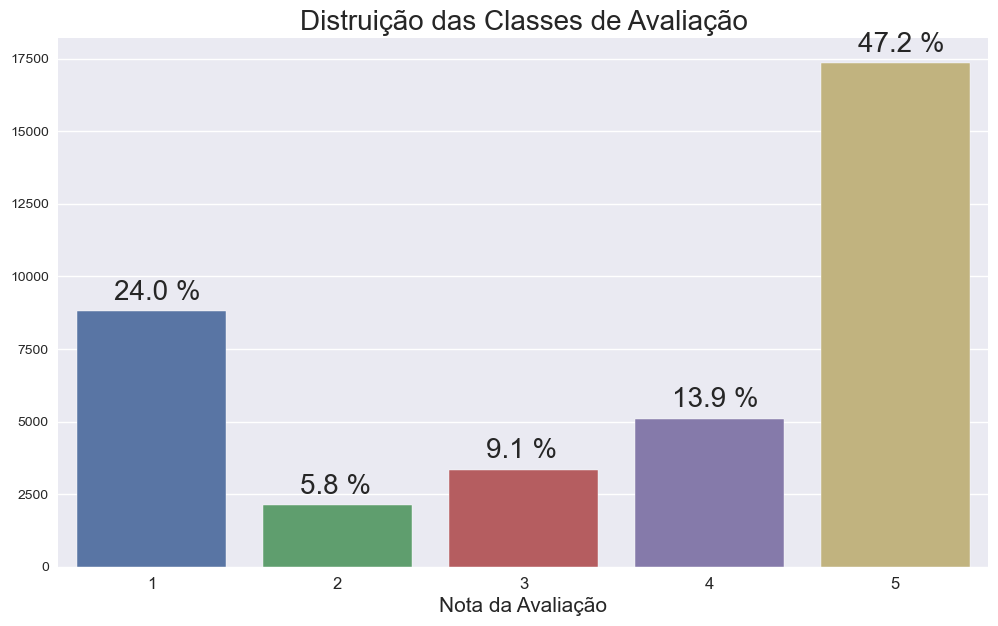

In [37]:
# Balanceamento de Classes
rating_counts = review_df['review_score'].value_counts().reset_index().sort_values('index').iloc[:,1].tolist()
rating_p = round(review_df['review_score'].value_counts(normalize=True).reset_index().sort_values('index').iloc[:,1] * 100, 1).apply(lambda x: '{} %'.format(x)).tolist()

fig, ax = plt.subplots(figsize=(12,7))
ax = sns.countplot(x=review_df['review_score'])
plt.xticks(fontsize=12)
plt.title('Distrui√ß√£o das Classes de Avalia√ß√£o',fontsize=20)
ax.set_ylabel('')
ax.set_xlabel('Nota da Avalia√ß√£o', size=15)
for i, v in enumerate(rating_counts):
    ax.text(i-0.2, v+400, rating_p[i], size=20);

In [38]:
#M√©dia de produtos comprados por transa√ß√£o
review_df['order_id'].value_counts().mean()

1.0015009688071392

# 3¬∞ Pr√©-Processamento


Em seguida, ler√≠amos nossos dados e realizar√≠amos algumas modifica√ß√µes iniciais no EDA e no conjunto de dados. O conjunto de dados de revis√£o tem uma quantidade significativa de valores NaN no texto e no t√≠tulo das revis√µes, portanto, ter√≠amos certeza de eliminar esses valores ausentes e redefinir o √≠ndice.

Assim como as tarefas normais do dia-a-dia da PNL, precisamos implementar algumas etapas de pr√©-processamento necess√°rias que envolvem; transformar os dados das revis√µes removendo stopwords(artigo, preposi√ß√£o), usando o m√≥dulo de express√£o regular para aceitar apenas letras, tokenizando o texto e tornando todas as palavras em min√∫sculas para consist√™ncia. Nesse caso, ter√≠amos que remover palavras irrelevantes em portugu√™s.

In [39]:
# Removendo valores duplicados
review_df = review_df.drop_duplicates('review_comment_message').reset_index(drop=True)

In [40]:
#Separando em dois campos de estudo: Vamos estudar separadamente o t√≠tulo e a Descri√ß√£o da avalia√ß√£o
#revisar o t√≠tulo do coment√°rio
review_data_title = review_df['review_comment_title']
review_data = review_df.drop(['review_comment_title'],axis=1)

In [41]:
# Descartando valores NaN
# Tratamento de missing
review_data  = review_data.dropna()
review_data_title = review_data_title.dropna()

In [42]:
review_data_title

2                        recomendo
4                  Super recomendo
6          N√£o chegou meu produto 
7                            √ìtimo
13                      Muito bom.
                   ...            
36684                 Nota m√°xima!
36686                            üëç
36687           muito bom produto 
36688    N√£o foi entregue o pedido
36689               Foto enganosa 
Name: review_comment_title, Length: 8802, dtype: object

In [43]:
# Reorganizar o √≠ndice de avalia√ß√µes e visualizar os dados
review_data = review_data.reset_index(drop=True)
review_data.head(3)
review_data.shape

review_id                          order_id  \
0  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
1  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
2  8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   

   review_score                             review_comment_message  \
0             5              Recebi bem antes do prazo estipulado.   
1             5  Parab√©ns lojas lannister adorei comprar pela I...   
2             4  aparelho eficiente. no site a marca do aparelh...   

  review_creation_date review_answer_timestamp  
0  2017-04-21 00:00:00     2017-04-21 22:02:06  
1  2018-03-01 00:00:00     2018-03-02 10:26:53  
2  2018-05-22 00:00:00     2018-05-23 16:45:47

(36698, 6)

In [44]:
# Reorganizar o √≠ndice de t√≠tulos de resenhas e visualizar os dados
review_data_title = review_data_title.reset_index(drop=True)
review_data_title.head(10)
review_data_title.shape

0                  recomendo
1            Super recomendo
2    N√£o chegou meu produto 
3                      √ìtimo
4                 Muito bom.
5                        Bom
6               Maravilhoso!
7           Entrega perfeita
8                   MT lindo
9            √ìtimo Produto! 
Name: review_comment_title, dtype: object

(8802,)

A partir das c√©lulas de c√≥digo acima, podemos deduzir que **58% dos clientes n√£o deixaram coment√°rios e apenas 11,7% dos clientes se preocuparam em dar t√≠tulos aos seus coment√°rios.**
Em seguida, ir√≠amos pr√©-processar as revis√µes e os t√≠tulos em prepara√ß√£o para visualiza√ß√£o e modelagem

In [45]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Silvio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Silvio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
# criando uma lista
# criando um banco de dados de stopwords, so com a lingua portuguesa
# prencher a lista vazia com for
comments = []
stop_words = set(stopwords.words('portuguese'))

for words in review_data['review_comment_message']:  # busca a informa√ß√µes do comentario
    only_letters = re.sub("[^a-zA-Z]", " ",words)#somente letras,substitui o que n√£o for letra por vazio
    tokens = nltk.word_tokenize(only_letters) #,token √© quebrar o texto em paragrafo,paragrafo em frase e frase em palavras
    lower_case = [l.lower() for l in tokens] #converter todas as letras para min√∫sculas
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #buscar as palavras que n√£o estao no stopwords(elimina stopwords), pega so as palvaras que estao no banco de dados
    comments.append(' '.join(filtered_result)) # apenda na lista

In [47]:
comments

['recebi bem antes prazo estipulado',
 'parab ns lojas lannister adorei comprar internet seguro pr tico parab ns todos feliz p scoa',
 'aparelho eficiente site marca aparelho impresso desinfector chegar outro nome atualizar marca correta vez aparelho',
 'pouco travando valor ta boa',
 'vendedor confi vel produto ok entrega antes prazo',
 'gostaria saber sempre recebi compra agora decpcionou',
 'p ssimo',
 'loja nota',
 'obrigado aten amim dispensada',
 'compra realizada facilmente entrega efetuada antes prazo dado produto j come ser usado at presente problemas',
 'rel gio bonito barato',
 'n gostei comprei gato lebre',
 'sempre compro internet entrega ocorre antes prazo combinado acredito ser prazo m ximo stark prazo m ximo j esgotou ainda n recebi produto',
 'recebi exatamente esperava demais encomendas outros vendedores atrasaram chegou prazo',
 'recomendo',
 'boa',
 't completamente apaixonada loja super respons vel confi vel',
 'nada chegar pedido',
 'bom cheiroso',
 'otimo vendedo

Visualiza√ß√£o de dados
Ap√≥s o pr√©-processamento de nossos dados, √© hora de visualizar nosso texto de revis√£o usando Wordclouds. Um Wordcloud √© uma representa√ß√£o visual dos dados do texto envolvidos e mostra a import√¢ncia das palavras pelo tamanho da fonte.

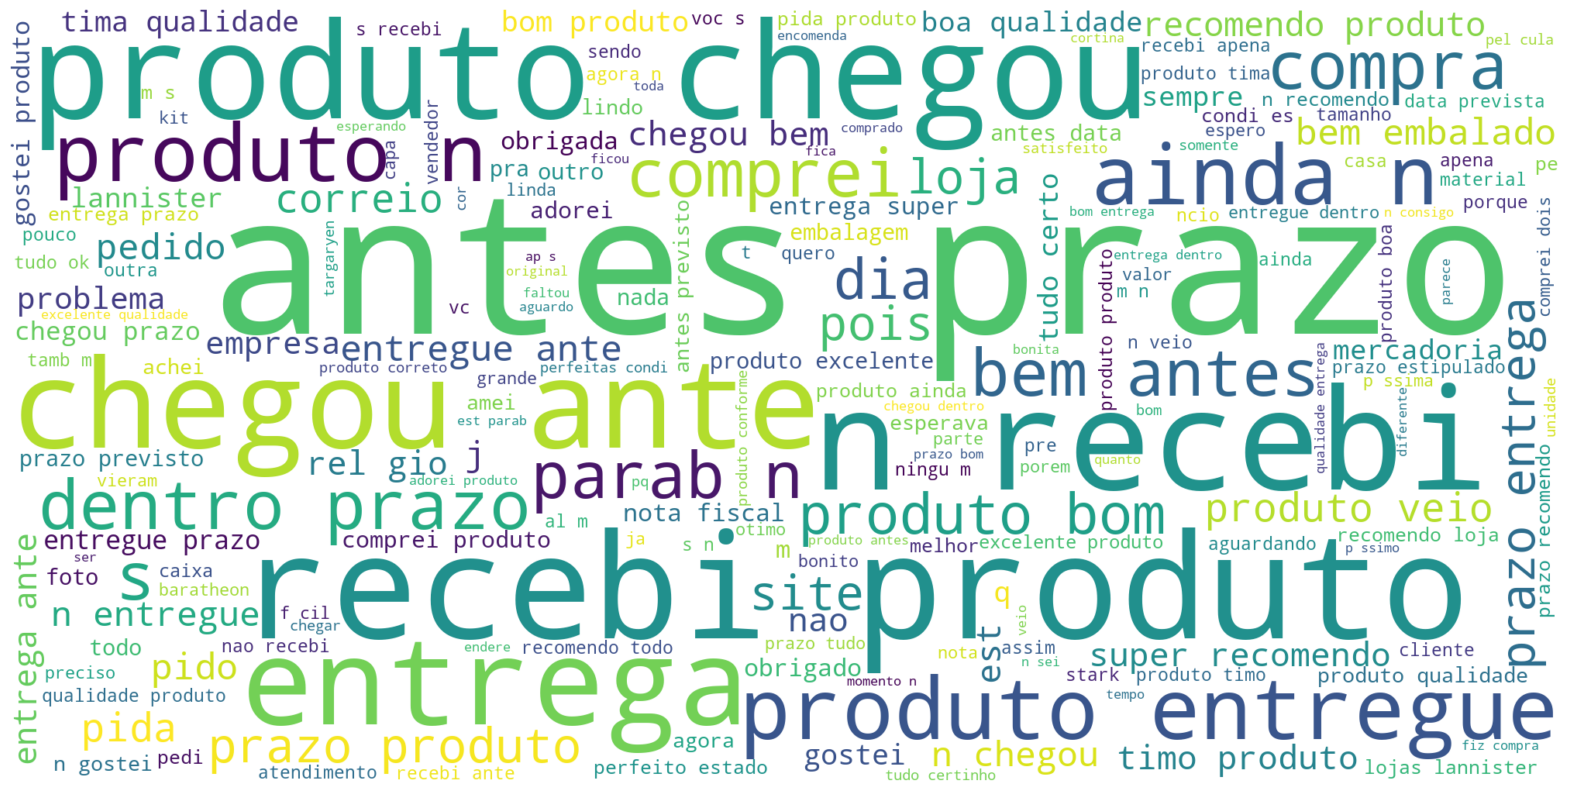

In [48]:
# Visualizando os dados das revis√µes limpas(descomente para ver)
# coment√°rios

#Usando wordcloud para visualizar os coment√°rios
unique_string=(" ").join(comments)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

In [49]:
# Usando CountVectorizer para obter os unigramas(uma palavra) mais importantes
co = CountVectorizer(ngram_range=(1,1))# quebra em uma palavra por vez
counts = co.fit_transform(comments) # pega todos os nomes em ordem descendente
important_unigrams = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

In [50]:
important_unigrams

0
produto    17898
prazo       8207
entrega     6456
chegou      5459
antes       5424
recebi      5179
recomendo   3932
entregue    3748
bom         3480
veio        3323
bem         3104
comprei     2839
qualidade   2722
loja        2413
ainda       2292
compra      2251
tudo        2094
at          1813
gostei      1747
super       1662
excelente   1527
timo        1478
dentro      1423
pedido      1409
dia         1381
nao         1363
pida        1329
lannister   1320
produtos    1286
est         1267
site        1219
boa         1184
pois        1114
ser         1087
sempre       992
pido         989
agora        955
dias         945
parab        932
ns           931
comprar      928
perfeito     895
pra          886
conforme     880
vel          872
certo        857
es           855
previsto     848
apenas       847
tima         836

In [51]:
# Usando CountVectorizer para obter os trigramas(tres palavras) mais importantes
co = CountVectorizer(ngram_range=(3,3))
counts = co.fit_transform(comments)
important_trigrams = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

In [52]:
important_trigrams

0
chegou antes prazo           1018
bem antes prazo               689
entregue antes prazo          560
produto chegou antes          421
chegou bem antes              406
entrega antes prazo           404
produto entregue antes        344
entrega super pida            280
antes prazo previsto          278
produto tima qualidade        236
antes prazo produto           226
produto boa qualidade         220
ainda recebi produto          219
entregue dentro prazo         217
antes data prevista           213
produto entregue prazo        208
perfeitas condi es            199
recebi antes prazo            191
antes prazo recomendo         185
est parab ns                  185
antes prazo estipulado        178
chegou dentro prazo           176
entrega pida produto          165
produto chegou bem            163
produto chegou prazo          162
entrega dentro prazo          154
recebi produto antes          128
entregue bem antes            126
produto antes prazo           121
nao recebi produto            121
produto entregue dentro       117
chegou antes previsto         114
prazo bem embalado            112
produto bem embalado          112
at agora recebi               111
produto excelente qualidade   109
at momento recebi             108
antes prazo tudo              105
at antes prazo                103
custo benef cio                97
antes prazo entrega            92
antes prazo super              88
antes prazo bom                88
entrega bem antes              87
produto chegou dentro          84
at agora nada                  84
chegou antes data              84
quero dinheiro volta           84
veio bem embalado              81
prazo super recomendo          80

In [53]:
#Em seguida, redefinimos o √≠ndice, renomeamos as colunas e aplicamos o m√≥dulo de tradu√ß√£o para obter as tradu√ß√µes em ingl√™s
important_trigrams=important_trigrams.reset_index()
important_trigrams.rename(columns={'index':'trigrams',0:'frequency'},inplace=True)


In [54]:
important_trigrams

trigrams  frequency
0            chegou antes prazo       1018
1               bem antes prazo        689
2          entregue antes prazo        560
3          produto chegou antes        421
4              chegou bem antes        406
5           entrega antes prazo        404
6        produto entregue antes        344
7            entrega super pida        280
8          antes prazo previsto        278
9        produto tima qualidade        236
10          antes prazo produto        226
11        produto boa qualidade        220
12         ainda recebi produto        219
13        entregue dentro prazo        217
14          antes data prevista        213
15       produto entregue prazo        208
16           perfeitas condi es        199
17           recebi antes prazo        191
18        antes prazo recomendo        185
19                 est parab ns        185
20       antes prazo estipulado        178
21          chegou dentro prazo        176
22         entrega pida produto        165
23           produto chegou bem        163
24         produto chegou prazo        162
25         entrega dentro prazo        154
26         recebi produto antes        128
27           entregue bem antes        126
28          produto antes prazo        121
29           nao recebi produto        121
30      produto entregue dentro        117
31        chegou antes previsto        114
32           prazo bem embalado        112
33         produto bem embalado        112
34              at agora recebi        111
35  produto excelente qualidade        109
36            at momento recebi        108
37             antes prazo tudo        105
38               at antes prazo        103
39              custo benef cio         97
40          antes prazo entrega         92
41            antes prazo super         88
42              antes prazo bom         88
43            entrega bem antes         87
44        produto chegou dentro         84
45                at agora nada         84
46            chegou antes data         84
47         quero dinheiro volta         84
48            veio bem embalado         81
49        prazo super recomendo         80

Observa√ß√µes
1. Dos unigramas, bigramas e trigramas acima, podemos **afirmar com seguran√ßa que a maioria dos clientes ficou satisfeita com o servi√ßo de entrega, alguns outros ficaram muito satisfeitos com a qualidade dos produtos.**
2. No entanto, existem **outros que n√£o ficaram satisfeitos** com os servi√ßos prestados e gostar√≠amos de **aprofundar** esta anomalia.
Tra√ßando as pontua√ß√µes da revis√£o antes e depois de remover os valores NaN

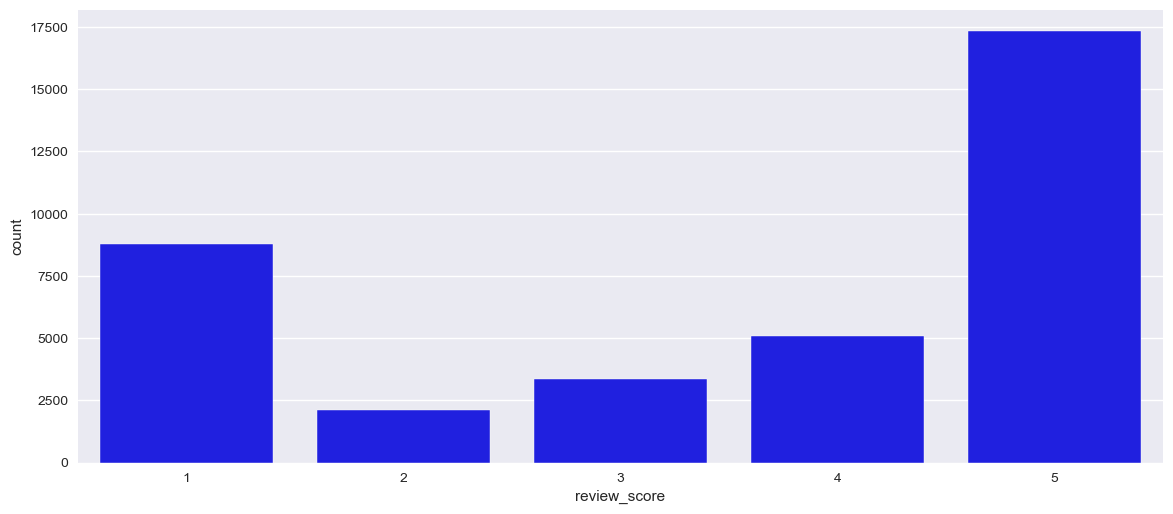

In [55]:
# Antes de remover os valores Nan
plt.figure(figsize = (14,6))
sns.countplot(review_df['review_score'], color= 'blue');

#Do gr√°fico acima, cerca de 60.000 pessoas deram avalia√ß√µes de 5 estrelas, enquanto um pouco mais de 10.000 pessoas deram avalia√ß√µes de 1 estrela

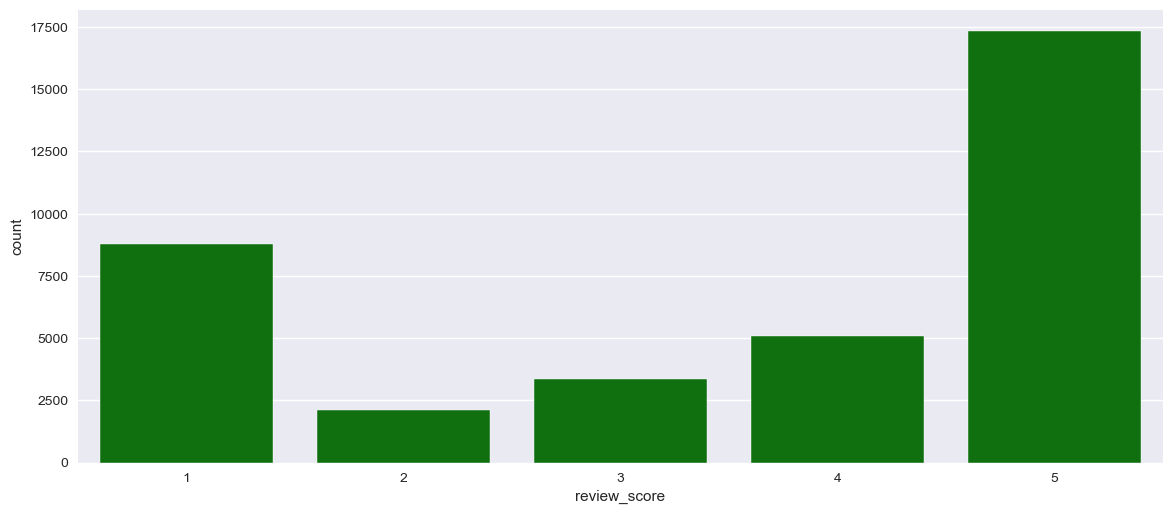

In [56]:
# Depois de remover os valores NaN
plt.figure(figsize = (14,6))
sns.countplot(review_data['review_score'], color= 'Green');

No gr√°fico acima, ap√≥s remover os valores NaN, cerca de 10.000 pessoas deram avalia√ß√µes de 1 estrela, enquanto um pouco mais de 20.000 pessoas deram avalia√ß√µes de 5 estrelas, o que significa que:
1. Cerca de 36% dos revisores de 5 estrelas deram coment√°rios, enquanto 79% dos revisores de 1 estrela deram coment√°rios, ent√£o um cliente era mais propenso a fazer coment√°rios quando ele / ela estava insatisfeito.
2. Para entender adequadamente os clientes insatisfeitos, construir√≠amos um modelo de an√°lise de sentimento que classificaria esses sentimentos. Mas antes de fazermos isso, precisamos tamb√©m dar uma olhada nos t√≠tulos das avalia√ß√µes.

In [57]:
# Processar os dados dos t√≠tulos das avalia√ß√µes
comments_titles = []
stop_words = set(stopwords.words('portuguese'))


for words in review_data_title:
    only_letters = re.sub("[^a-zA-Z]", " ",words)
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case = [l.lower() for l in tokens] #convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    
    comments_titles.append(' '.join(filtered_result))

In [58]:
comments_titles

['recomendo',
 'super recomendo',
 'n chegou produto',
 'timo',
 'bom',
 'bom',
 'maravilhoso',
 'entrega perfeita',
 'mt lindo',
 'timo produto',
 'recomendo sempre',
 'recomendo',
 'otimo',
 'entrega atrasou',
 'boa',
 '',
 'm dio',
 'prazo entrega',
 'super produto',
 'falta produto quebra',
 'super recomendo',
 'n recebi ainda',
 'recomendo',
 'nota',
 'suspense',
 'top',
 'produto show',
 'super recoendo',
 'erraram caixa ac stica',
 'tima compra',
 'horr vel',
 'super recomendo',
 'bom',
 'otimo',
 '',
 'recomendo',
 'bom',
 'lamenet vel',
 'qualidade ruim',
 'insatisfeito',
 'mega recomendo',
 'excelente produto',
 'recomendo',
 'nao entrega produto',
 'recomendo',
 'captador presys blend',
 'produto pirata',
 'produto fraco',
 'nota',
 'tudo certo',
 'recomendo',
 'otimo',
 'perfeito',
 'lol pet',
 'excelente',
 'timo custo x benef cio',
 'bom',
 'produto entrega timos',
 'produto ok',
 'excelente',
 'recomendo todos',
 'super recomendado',
 'super recomendo',
 'super satisfeit

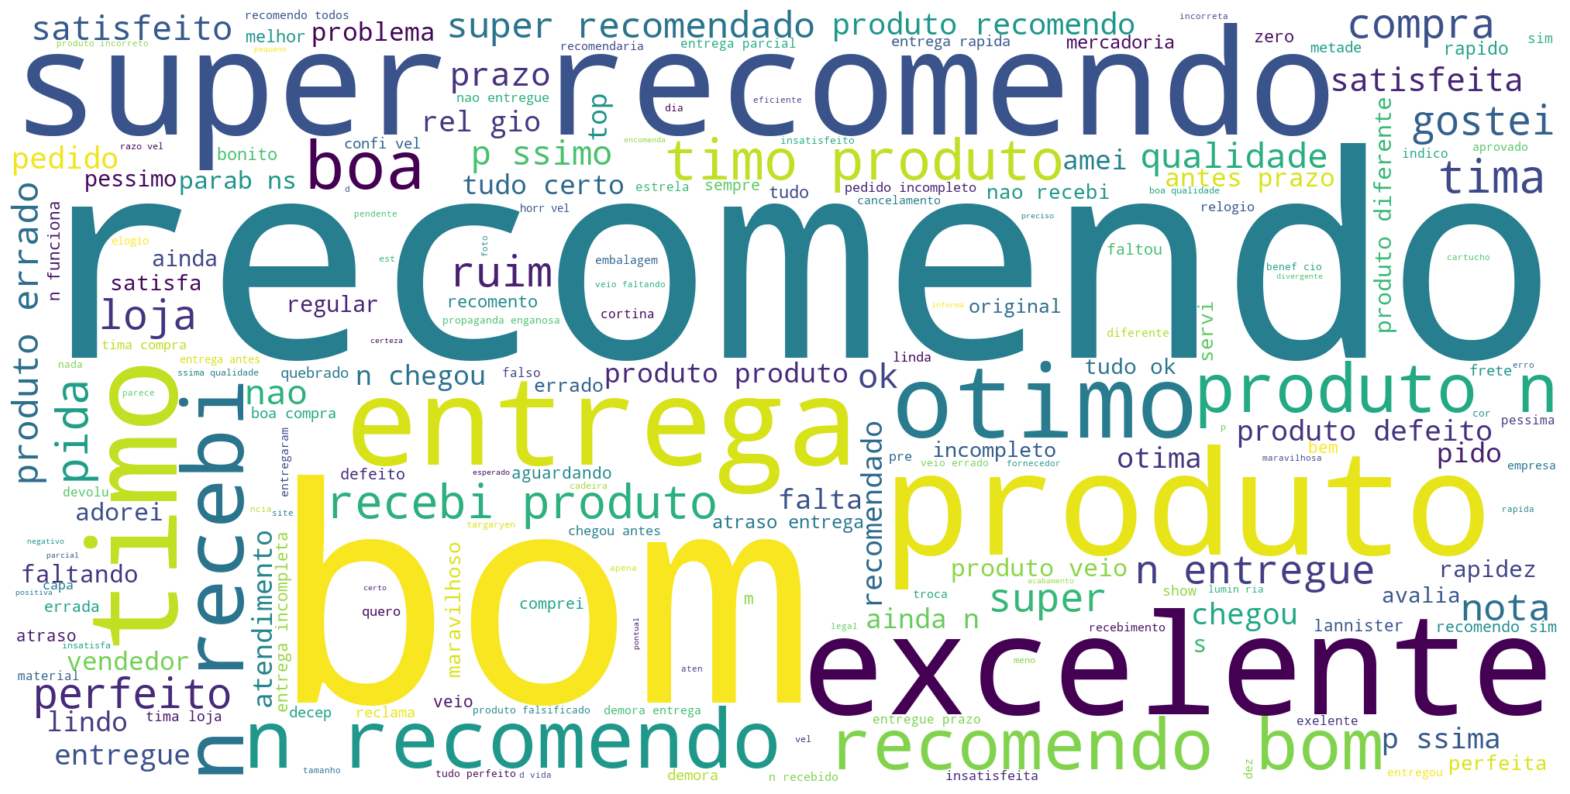

In [59]:
#Usando wordcloud para visualizar os t√≠tulos dos coment√°rios
unique_string=(" ").join(comments_titles)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();


In [60]:
# Usando CountVectorizer para obter os unigramas mais importantes
co = CountVectorizer(ngram_range=(1,1))
counts = co.fit_transform(comments_titles)
important_unigrams_title = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

In [61]:
important_unigrams_title

0
recomendo    1518
produto      1177
bom           872
super         660
timo          477
excelente     475
entrega       454
recebi        251
otimo         236
boa           160
entregue      158
tima          140
recomendado   124
compra        120
tudo          120
prazo         115
nao           108
perfeito      104
chegou        104
errado        104
pida          103
loja          102
ruim           96
ok             92
gostei         89
nota           89
qualidade      88
veio           79
ssimo          77
defeito        73
pedido         67
satisfeito     66
ainda          66
satisfeita     62
vel            57
falta          51
certo          50
otima          48
ssima          48
diferente      47
antes          46
faltando       46
rel            46
gio            45
top            42
pido           41
atraso         41
atendimento    40
amei           39
incompleto     39

In [62]:
co = CountVectorizer(ngram_range=(2,2))
counts = co.fit_transform(comments_titles)
important_bigrams_title = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

In [63]:
important_bigrams_title

0
super recomendo     496
recebi produto      106
produto entregue     89
timo produto         86
super recomendado    75
entrega pida         73
produto errado       71
bom produto          64
produto bom          59
produto defeito      48
rel gio              45
tudo certo           42
produto veio         33
antes prazo          33
parab ns             31
produto diferente    27
tudo ok              26
otimo produto        25
excelente produto    25
entrega super        25
nao recebi           24
super pida           23
nao recomendo        23
atraso entrega       22
produto excelente    21
ainda recebi         20
entrega incompleta   19
produto chegou       18
entrega prazo        17
entrega rapida       17
confi vel            17
recomendo loja       16
recomendo sim        16
tima loja            16
pedido incompleto    15
boa compra           15
produto qualidade    15
produto ok           15
tima compra          15
chegou antes         15
nao entregue         15
entrega parcial      14
demora entrega       14
produto recebido     14
recomendo todos      13
faltando produto     13
entregue prazo       13
produto nao          13
horr vel             12
excelente compra     12

In [64]:
co = CountVectorizer(ngram_range=(3,3))
counts = co.fit_transform(comments_titles)
important_trigrams_title = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

In [65]:
important_trigrams_title

0
entrega super pida        21
entrega antes prazo       11
custo benef cio           11
nao recebi produto        10
chegou antes prazo         8
produto boa qualidade      7
produto nao entregue       7
produto entregue prazo     7
produto veio errado        7
produto veio defeito       6
ainda nao recebi           5
recebi produto errado      5
produto entregue errado    5
produto diferente foto     5
rel gio casio              4
bom neg cio                4
bom custo benef            4
produto ainda chegou       4
ainda recebi produt        4
recomendo restri es        4
entrega super rapida       4
entrega dentro prazo       4
rel gio bom                3
timo custo benef           3
entrega faltando produto   3
nao recebi produt          3
recebi produto cert        3
timo custo beneficio       3
bom rel gio                3
produto veio quebrado      3
rel gio falso              3
produto veio diferente     3
produto ssima qualid       3
loja confi vel             3
lindo rel gio              3
produto mal embalado       3
produto nao chegou         3
produto baixa qualidad     3
entregue antes prazo       3
poderia ser melhor         3
produto mal feito          2
veio cor errada            2
posso avaliar ainda        2
entrega ok produto         2
veio produto errado        2
mandaram produto errado    2
recebi parte produto       2
recebi pedido incompleto   2
recebi pedido todo         2
veio faltando mercadoria   2

Uma **sacada** massa seria pedir pelo menos 3 ou 4 palavras para os clientes, visto que com tri-grama a gente j√° consegue se aprofundar bastante quanto a satisfa√ß√£o ou n√£o do cliente bem como o problema real ocorrido.

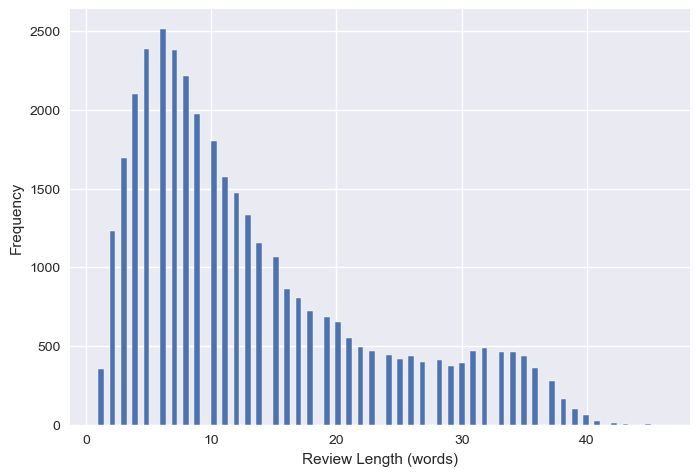

In [66]:
# Obtendo o n√∫mero de palavras dividindo-as por um espa√ßo
words_per_review = review_data.review_comment_message.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show();

In [67]:
print('Average words:', words_per_review.mean())
print('Skewness:', words_per_review.skew())

Average words: 13.323886860319364
Skewness: 0.9950704707400344


Em seguida, ler√≠amos nossos dados e realizar√≠amos algumas modifica√ß√µes iniciais no EDA e no conjunto de dados. O conjunto de dados de revis√£o tem uma quantidade significativa de valores NaN no texto e no t√≠tulo das revis√µes, portanto, ter√≠amos certeza de eliminar esses valores ausentes e redefinir o √≠ndice.

Assim como as tarefas normais do dia-a-dia da PNL, precisamos implementar algumas etapas de pr√©-processamento necess√°rias que envolvem; transformar os dados das revis√µes removendo stopwords, usando o m√≥dulo de express√£o regular para aceitar apenas letras, tokenizando o texto e tornando todas as palavras em min√∫sculas para consist√™ncia. Nesse caso, ter√≠amos que remover palavras irrelevantes em portugu√™s.

In [68]:
# Verificar a porcentagem das pontua√ß√µes da revis√£o. 3 e 4 s√£o as menores pontua√ß√µes aqui.
percent_scores = 100 * review_data['review_score'].value_counts()/len(review_data)
percent_scores

5    47.231457
1    23.965884
4    13.894490
3     9.109488
2     5.798681
Name: review_score, dtype: float64


# 4¬∞ M√°quina Preditiva de An√°lise de Sentimentos



Este seria um caso de aprendizado supervisionado, portanto, ter√≠amos que criar uma nova coluna representando a pontua√ß√£o de sentimento (1 ou 0). 1 √© para palavras positivas e 0, para palavras negativas. Excluir√≠amos a pontua√ß√£o de revis√£o de 3 pontos porque representa neutra e incluir√≠amos as pontua√ß√µes de 1 e 2 como palavras negativas e as pontua√ß√µes de 4 e 5 na revis√£o para palavras positivas.

In [69]:
# Mapeando as avalia√ß√µes
# Avalia√ß√£o de sentimento
review_data['Sentiment_rating'] = np.where(review_data.review_score > 3,1,0)# pega o campo score, se for maior que 3,√© positivo(1) se n√£o negativo(0)

# Remover avalia√ß√µes neutras 
review_data = review_data[review_data.review_score != 3]# eliminar os indecisos(diferente de 3)

# Imprimir as contagens de cada classe
review_data['Sentiment_rating'].value_counts()

1    22432
0    10923
Name: Sentiment_rating, dtype: int64

In [70]:
# Dando uma olhada, as linhas com 3 como pontua√ß√µes de revis√£o foram removidas.
review_data.head()
review_data['Sentiment_rating'].shape

review_id                          order_id  \
0  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
1  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
2  8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
3  4b49719c8a200003f700d3d986ea1a19  9d6f15f95d01e79bd1349cc208361f09   
4  3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   

   review_score                             review_comment_message  \
0             5              Recebi bem antes do prazo estipulado.   
1             5  Parab√©ns lojas lannister adorei comprar pela I...   
2             4  aparelho eficiente. no site a marca do aparelh...   
3             4    Mas um pouco ,travando...pelo valor ta Boa.\r\n   
4             5  Vendedor confi√°vel, produto ok e entrega antes...   

  review_creation_date review_answer_timestamp  Sentiment_rating  
0  2017-04-21 00:00:00     2017-04-21 22:02:06                 1  
1  2018-03-01 00:00:00     2018-03-02 10:26:53                 1  
2  2018-05-22 00:00:00     2018-05-23 16:45:47                 1  
3  2018-02-16 00:00:00     2018-02-20 10:52:22                 1  
4  2018-05-23 00:00:00     2018-05-24 03:00:01                 1

(33355,)

In [71]:

comments = []
stop_words = set(stopwords.words('portuguese'))


for words in review_data['review_comment_message']:
    only_letters = re.sub("[^a-zA-Z]", " ",words)
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case = [l.lower() for l in tokens] #convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    
    comments.append(' '.join(filtered_result))

In [72]:
co_counts = CountVectorizer(stop_words =set(stopwords.words('portuguese')),
                             ngram_range=(1,4)) # unigrams to trigrams -unigrama ate trigrama

co_data = co_counts.fit_transform(comments)

In [73]:
co_data

<33355x422300 sparse matrix of type '<class 'numpy.int64'>'
	with 853199 stored elements in Compressed Sparse Row format>

In [74]:
# Dividindo a coluna de pontua√ß√£o de sentimento em conjuntos de teste e treinamento
X_train_co, X_test_co, y_train_co, y_test_co= train_test_split(co_data,
                                                                    review_data['Sentiment_rating'],
                                                                    test_size = 0.2,
                                                                    random_state = 7)

In [75]:
y_test_co.value_counts()/y_test_co.shape[0]
# 70% of sentiments are classified as positive
# 30% of sentiments are classified as negative

1    0.670364
0    0.329636
Name: Sentiment_rating, dtype: float64

In [76]:
# Definindo e treinando o modelo
# regress√£o logistica
lr_model = LogisticRegression()
lr_model.fit(X_train_co, y_train_co)

LogisticRegression()

# 5¬∞ Avalia√ß√£o da M√°quina

In [77]:
# Prevendo os resultados
test_pred = lr_model.predict(X_test_co)

print("Acur√°cia: ", accuracy_score(y_test_co,test_pred))
print("F1 score: ", f1_score(y_test_co,test_pred))


Acur√°cia:  0.9153050517163843
F1 score:  0.9369630704005355


In [78]:
print("CM", confusion_matrix(y_test_co,test_pred))

CM [[1907  292]
 [ 273 4199]]


In [79]:
# Peso da variaveis

lr_weights = pd.DataFrame(list(zip(co_counts.get_feature_names(), # obter todos os nomes de recursos n-gram
                                   lr_model.coef_[0])), # obter os coeficientes de regress√£o log√≠stica
                          columns= ['words','weights']) # definindo os nomes das colunas

Positive_sentiments = pd.DataFrame(lr_weights.sort_values(['weights'], ascending = False)[:15]) # 15 principais recursos mais importantes para avalia√ß√µes positivas
Positive_sentiments

words   weights
166117   excelente  3.074580
389505        timo  2.716582
275749        pido  2.658896
215210       lindo  2.459539
45930          bom  2.448418
17056         amei  2.447974
255738       otimo  2.424515
358921  satisfeito  2.328742
5972        adorei  2.243131
272381    perfeito  2.155283
250603    obrigada  2.134900
274700        pida  2.102944
255494       otima  2.091470
388656        tima  2.083316
62096     certinho  1.950570

In [80]:
Negative_Sentiments = pd.DataFrame(lr_weights.sort_values(['weights'], ascending = False)[-15:]) # 15 principais recursos mais importantes para avalia√ß√µes negativas
Negative_Sentiments

words   weights
146248    entregaram -1.535822
274004       pessima -1.559362
110567     demorando -1.562348
203228  insatisfeita -1.626506
107396  decepcionada -1.649937
329651      quebrado -1.656559
264650        passou -1.658878
374953         ssima -1.701840
123144     diferente -1.727206
34507       atrasada -1.734889
9723      aguardando -1.765699
107317         decep -1.776360
201260      inferior -2.055978
375299         ssimo -2.193243
355619          ruim -2.368136

Executing shutdown due to inactivity...


2021-01-07 12:24:15,064 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-01-07 12:24:19,204 - INFO     - Executing shutdown...


# **Resum√£o**

Fazemos a an√°lise dos textos de coment√°rios dos clientes e vimos os coment√°rios infelizes feitos por alguns deles. Agora, cabe ao cientista / analista de dados descobrir as melhores maneiras de garantir que esses problemas sejam resolvidos.


Voc√™ sabe como realizar uma visualiza√ß√£o b√°sica de texto  Existem in√∫meras outras ideias que podem ser implementadas neste conjunto de dados, como an√°lise de sentimento e modelagem de t√≥picos. Quem sabe a gente faz n√©?

Simb√≥ra!



## Inspira√ß√£o trabalhos Futuros

Aqui est√£o algumas inspira√ß√µes para os resultados poss√≠veis deste conjunto de dados.

**PNL**:

Este conjunto de dados oferece um ambiente supremo para analisar o texto das avalia√ß√µes em suas m√∫ltiplas dimens√µes.

**Clustering**:

Alguns clientes n√£o escreveram um coment√°rio. Mas por que eles est√£o felizes ou t√£o loucos?

**Previs√£o de vendas**:

Com as informa√ß√µes da data de compra, voc√™ poder√° prever vendas futuras.

**Desempenho de entrega**:

Voc√™ tamb√©m poder√° trabalhar com o desempenho da entrega e encontrar maneiras de otimizar os tempos de entrega.

**Qualidade do produto**:

Divirta-se descobrindo as categorias de produtos que s√£o mais propensas √† insatisfa√ß√£o do cliente.

**Engenharia de recursos**:

Crie recursos a partir desse rico conjunto de dados ou anexe algumas informa√ß√µes p√∫blicas externas a ele.

**Reconhecimentos**
Obrigado a **Olist** por liberar este conjunto de dados 

# Fim